In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


In [6]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [7]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


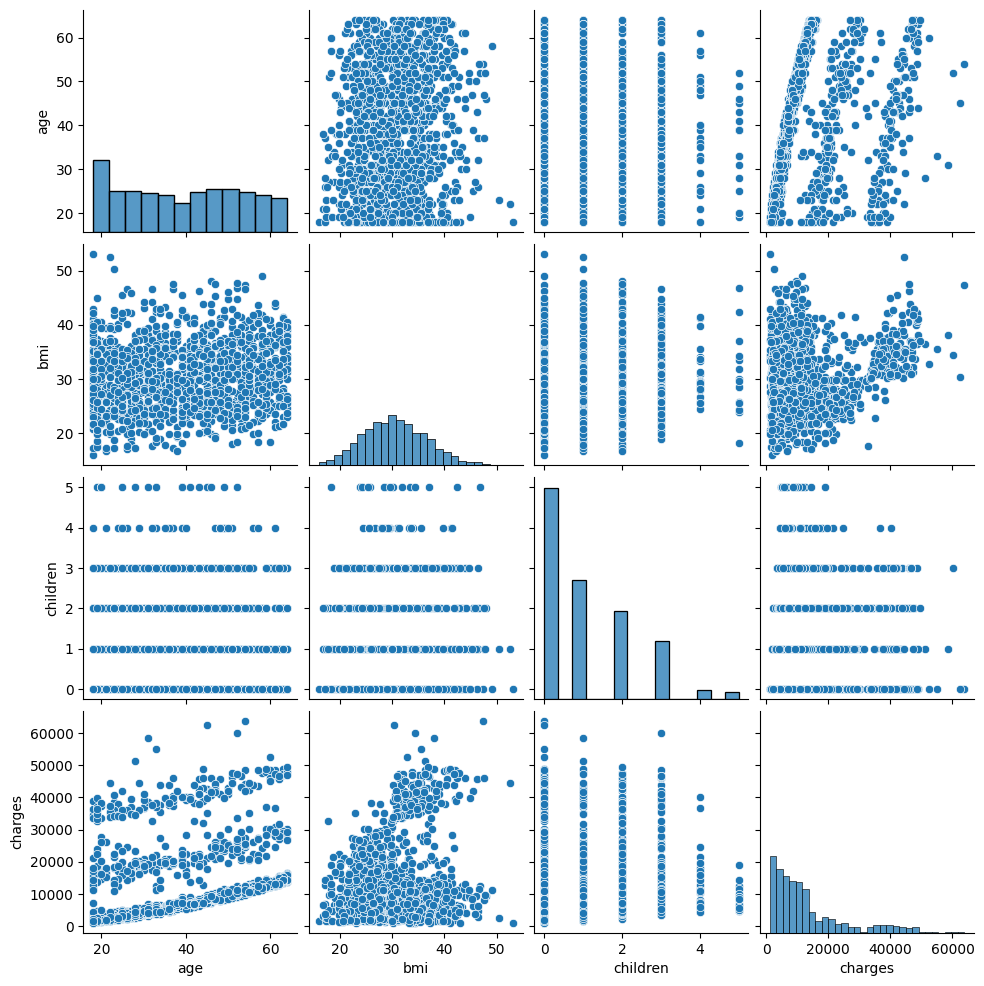

In [9]:
sns.pairplot(df)

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
ohe = OneHotEncoder()

In [12]:
df_transformed = ohe.fit_transform(df[['sex','smoker','region']])
cols = ohe.get_feature_names_out(['sex','smoker','region'])
df = pd.concat([df,pd.DataFrame(df_transformed.toarray(),columns=cols)],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [15]:
df = df.drop(columns= ['sex','smoker','region'])

In [16]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


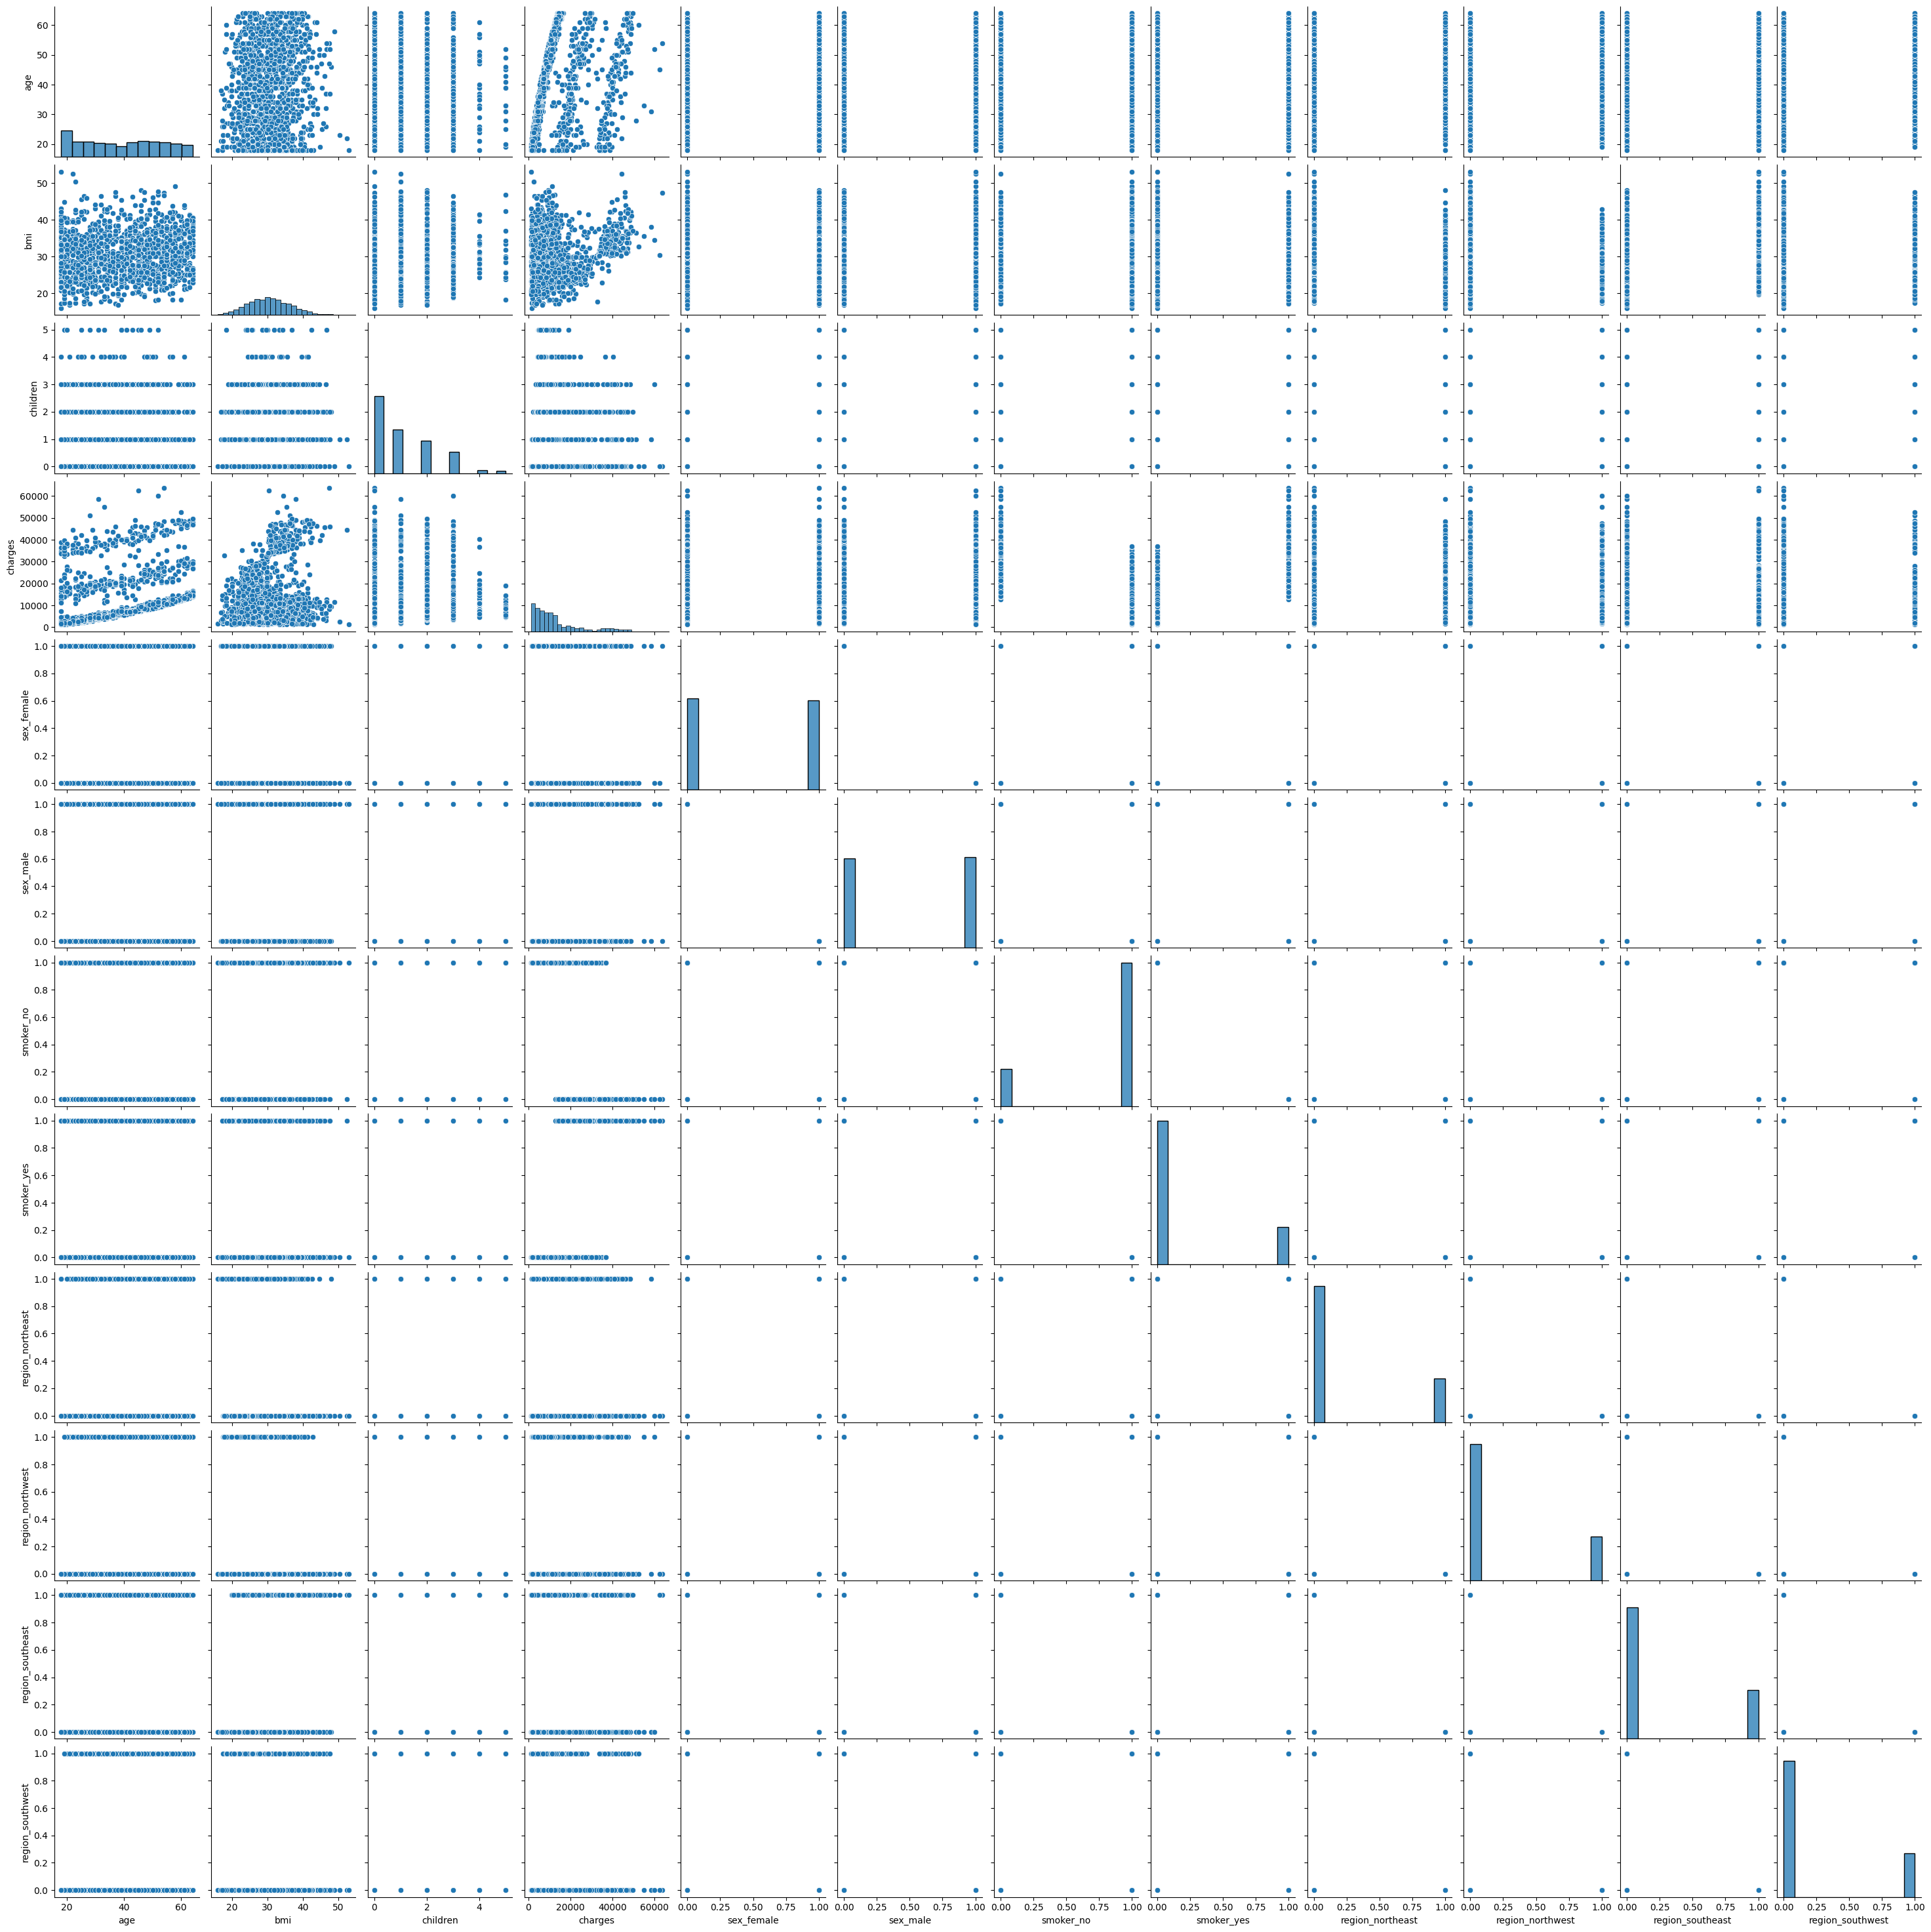

In [17]:
sns.pairplot(df)
plt.show()

Standar Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X = df.drop(columns=['charges'])
y = df['charges']

In [22]:
X_transfrom = scaler.fit_transform(X)

In [25]:
X_transfrom

array([[-1.43876426, -0.45332   , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]])

Train test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,Y_trian,Y_test = train_test_split(X_transfrom,y,test_size=0.2,random_state=42)

Lasso Model

In [29]:
from sklearn.linear_model import LassoCV

In [31]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv = 5, random_state=42)

In [33]:
lasso.fit(X_train,Y_trian)

LassoCV(cv=5, random_state=42)

Evalution

In [35]:
# from sklearn.metrics import r2_scroe, mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
Y_pred = lasso.predict(X_test)

In [38]:
r2= r2_score(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)

In [40]:
print("\n🔍 Best Lambda (alpha):", lasso.alpha_)
print("📊 R² Score:", r2)
print("🧮 MSE:", mse)


🔍 Best Lambda (alpha): 115.70957474914049
📊 R² Score: 0.7809393281409421
🧮 MSE: 34008891.42585437


In [41]:
coefficients = pd.Series(lasso.coef_, index=X.columns)
print("\n📌 Lasso Coefficients:")
print(coefficients)


📌 Lasso Coefficients:
age                 3508.957580
bmi                 1907.687477
children             408.886836
sex_female            -0.000000
sex_male               0.000000
smoker_no          -9422.786906
smoker_yes             0.000000
region_northeast     112.369434
region_northwest       0.000000
region_southeast      -0.000000
region_southwest     -46.459494
dtype: float64


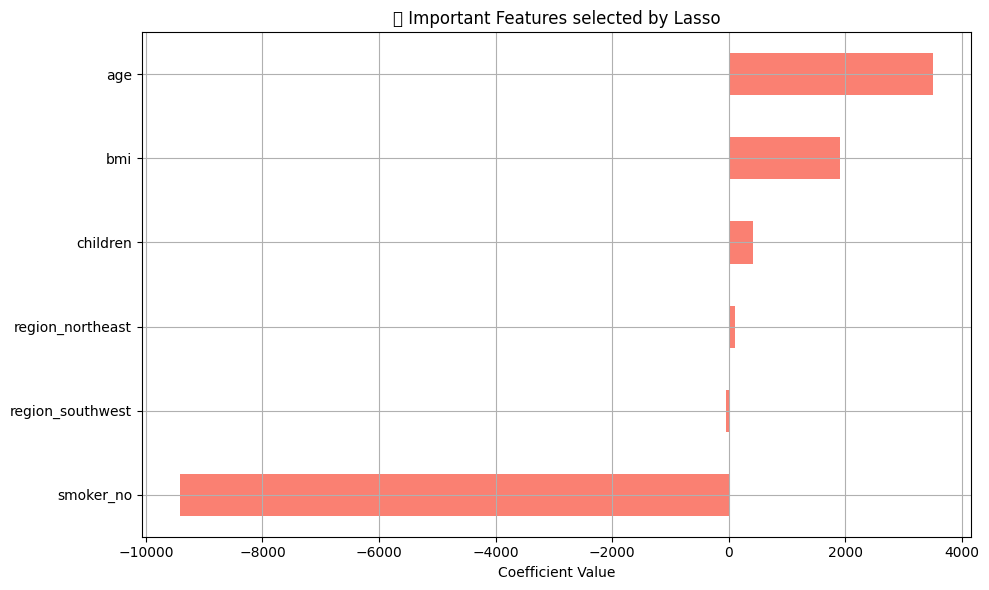

In [42]:
# Visualize Important Features
plt.figure(figsize=(10,6))
coefficients[coefficients != 0].sort_values().plot(kind='barh', color='salmon')
plt.title("💡 Important Features selected by Lasso")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
import pickle
with open('lasso_model.pkl','wb') as f:
  pickle.dump(lasso, f)

In [45]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']